## Importation des Bilbiothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [2]:
df = pd.read_excel("D:\Projects\Rapport de stage\Consommation d'électricité.xls", sheet_name = "Algerie", index_col=0)
df = df.transpose()
df

Année,Consommation d'electricité par habitant
1971,133.873489
1972,142.875928
1973,158.754155
1974,170.660458
1975,195.692277
1976,220.065773
1977,233.124176
1978,278.970600
1979,314.567685
1980,330.304373


In [3]:
df["Année"] = df.index
df.reset_index(inplace=True)
df.head()

Année,index,Consommation d'electricité par habitant,Année
0,1971,133.873489,1971
1,1972,142.875928,1972
2,1973,158.754155,1973
3,1974,170.660458,1974
4,1975,195.692277,1975


In [4]:
df["Année"] = pd.to_datetime(df["Année"], format="%Y")


In [5]:
df.drop(["index"], axis=1, inplace=True)

In [6]:
df.set_index("Année", inplace = True)

In [7]:
df.head()

Année,Consommation d'electricité par habitant
Année,
1971-01-01,133.873489
1972-01-01,142.875928
1973-01-01,158.754155
1974-01-01,170.660458
1975-01-01,195.692277


Text(0.5, 1.0, "Consommation d'electricité par habitant par année")

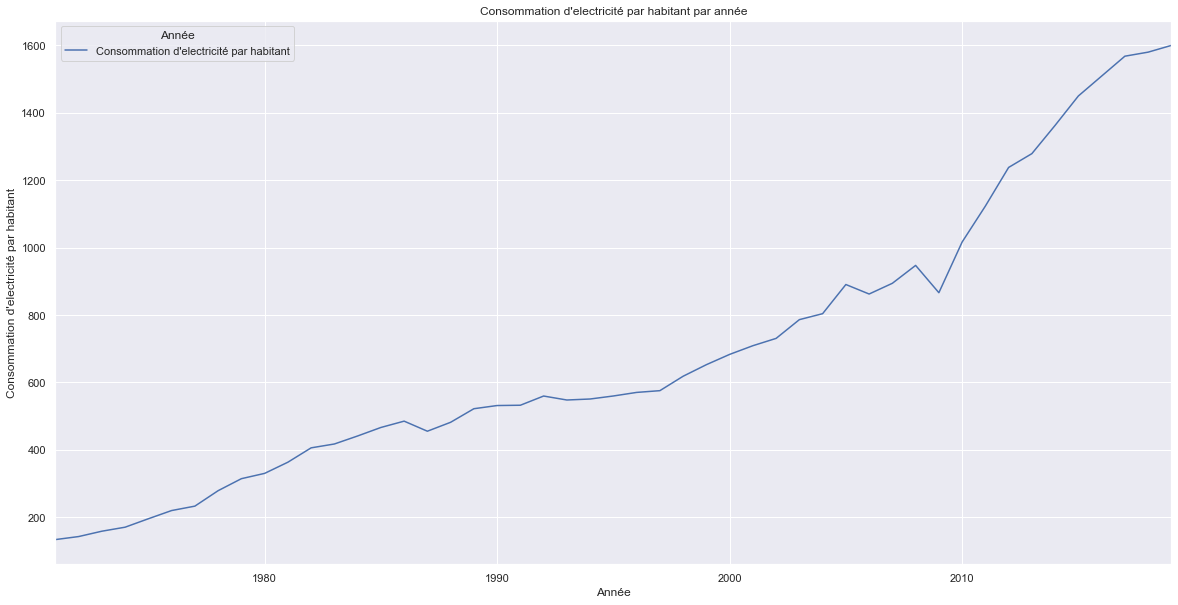

In [8]:
df.plot(figsize=(20,10))
plt.xlabel("Année")
plt.ylabel("Consommation d'electricité par habitant")
plt.title("Consommation d'electricité par habitant par année")

In [9]:
size = int(len(df)*0.9)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
df_train.tail()

Année,Consommation d'electricité par habitant
Année,
2010-01-01,1016.636669
2011-01-01,1123.332731
2012-01-01,1237.966507
2013-01-01,1278.915343
2014-01-01,1362.871919


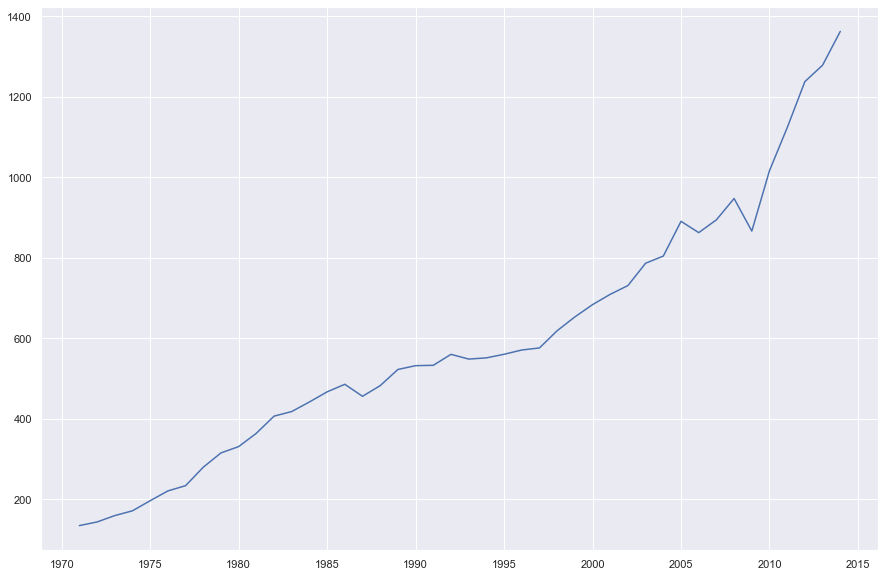

In [10]:
plt.figure(figsize=(15,10))
plt.plot(df_train)


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
def tsplot(y, lags=None,title=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if title == None:
        title = "Time Series Analysis Plots"
    else:
        title = str(title)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = adfuller(y)[1]
        ts_ax.set_title(title + '\n Dickey-Fuller: p_value = {0:.5f}'.format(p_value))
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

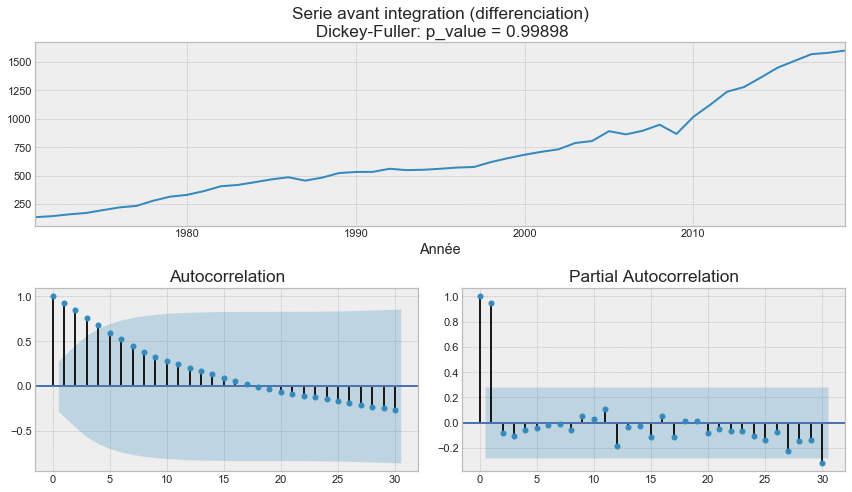

In [10]:
tsplot(df["Consommation d'electricité par habitant"],lags=30, title = "Serie avant integration (differenciation)")

In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df) 
print('Statistic : %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print("since the p_value=", result[1],"> 0.05, then we fail to reject the null hypothesis, which means that the serie is not stationnary")
else:
    print("since the p_value=", result[1],"≤ 0.05, then we reject the null hypothesis, which means that the serie is stationnary")

Statistic : 2.336157
p-value: 0.998977
Critical values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
since the p_value= 0.9989770234115176 > 0.05, then we fail to reject the null hypothesis, which means that the serie is not stationnary


In [24]:
data_train = df_train.diff()
data_train = data_train.dropna()
data_train.head()

Année,Consommation d'electricité par habitant
Année,
1972-01-01,9.002438
1973-01-01,15.878228
1974-01-01,11.906302
1975-01-01,25.031819
1976-01-01,24.373496


In [13]:
data = df.diff()
data = data.dropna()
data.head()

Année,Consommation d'electricité par habitant
Année,
1972-01-01,9.002438
1973-01-01,15.878228
1974-01-01,11.906302
1975-01-01,25.031819
1976-01-01,24.373496


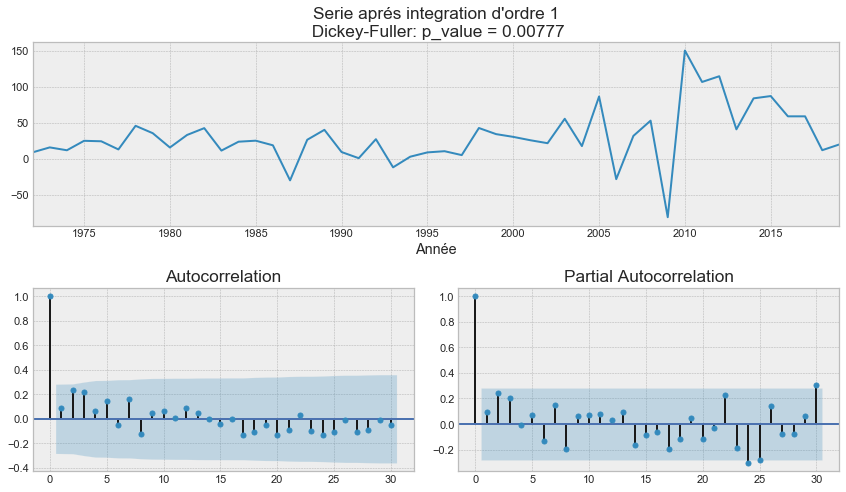

In [14]:
tsplot(data["Consommation d'electricité par habitant"],lags=30, title="Serie aprés integration d'ordre 1")

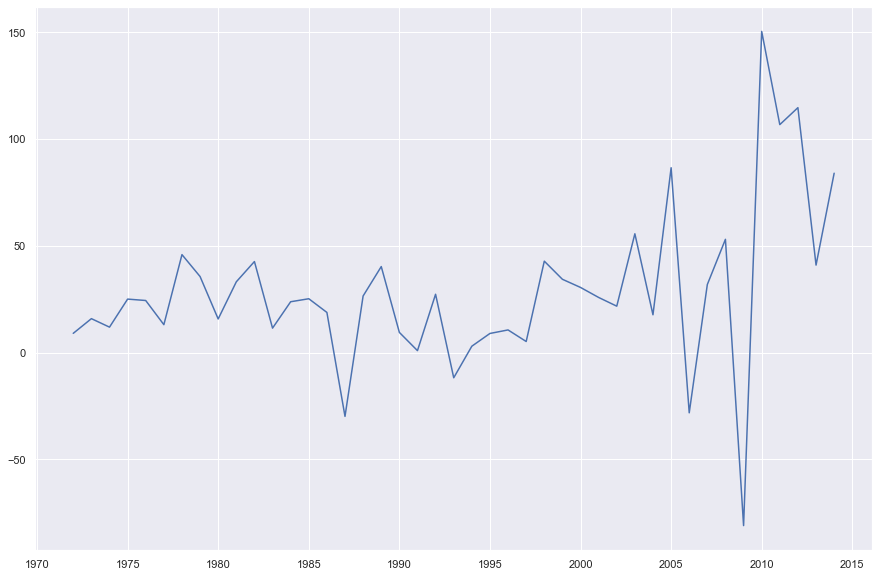

In [114]:
plt.figure(figsize=(15,10))
plt.plot(data_train)


In [115]:
result = adfuller(data_train) 
print('Statistic : %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print("since the p_value=", result[1],"> 0.05, then we fail to reject the null hypothesis, which means that the serie is not stationnary")
else:
    print("since the p_value=", result[1],"≤ 0.05, then we reject the null hypothesis, which means that the serie is stationnary")


Statistic : -6.090193
p-value: 0.000000
Critical values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
since the p_value= 1.0409501508051966e-07 ≤ 0.05, then we reject the null hypothesis, which means that the serie is stationnary


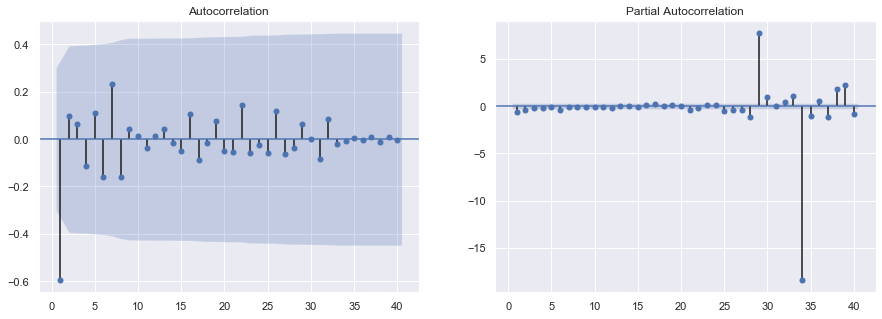

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plot_acf(data_train, lags = 40, zero = False, ax=axes[0])
plot_pacf(data_train, lags = 40, zero = False, ax=axes[1])
plt.show()

In [19]:
import pmdarima as pm
def arimamodel(train_series):
    automodel = pm.auto_arima(train_series, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel
automodel = arimamodel(df)
print(automodel.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=481.116, BIC=488.516, Time=1.480 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=507.113, BIC=510.813, Time=0.074 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=490.066, BIC=495.617, Time=0.130 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=479.128, BIC=484.678, Time=0.187 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=505.114, BIC=506.964, Time=0.021 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=482.195, BIC=491.446, Time=0.554 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=482.653, 